# Google Apps 商店的数据分析

## 简介

相信大家对移动应用商店都不陌生吧。Google Play Store（Google Play商店）是谷歌官方的软件应用商店，拥有上架软件数十万款，下载量更是突破了20亿次，为了手机用户提供了极为广泛的应用选择，很受大家的欢迎。



本数据集(googleplaystore.csv)包含了 Google Play 商店中 App 的数据。该数据是Kaggle中 [Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps) 的一部分，其中包含 Google Play 商店中 10k+ 应用软件的信息。

数据中的变量含义解释：
```
App: 应用的名称，字符变量。
Category: 应用所属的分类，字符变量。
Rating: 某应用的用户评分，数值变量。
Reviews: 某应用获得的用户评论数量，数值变量。
Size: 某应用的所占存储空间的大小，字符变量。
Installs: 用户安装和下载某应用的次数，字符变量。
Type: 付费或免费，分类变量。
Price: 价格，字符变量。
Content Rating: 应用商店针对内容给出的年龄评级组 - Children / Mature 21+ / Adult，分类变量。
Genres: 类型/流派，一个应用可以属于多个流派，比如音乐、游戏、家庭等，字符变量。
Last Updated: 应用最新更新的日期，字符变量。
Current Ver: 当前应用的版本，字符变量。
Android Ver: 安装该应用所需要的最低安卓版本，字符变量。

```

## 项目完成指南



本项目中的数据分析流程已经给出，但代码将完全由你自己进行书写，如果你无法完成本项目，说明你目前的能力并不足以完成 数据分析(进阶)纳米学位，建议先进行 数据分析（入门）纳米学位的学习，掌握进阶课程的先修知识。

对于数据分析过程的记录也是数据分析报告的一个重要部分，你可以自己在需要的位置插入Markdown cell，记录你在数据分析中的关键步骤和推理过程。比如：数据有什么样的特点，统计数据的含义是什么，你从可视化中可以得出什么结论，下一步分析是什么，为什么执行这种分析。如果你无法做到这一点，你也无法通过本项目。


> **小贴士**: 像这样的引用部分旨在为学员提供实用指导，帮助学员了解并使用 Jupyter notebook

## 提出问题

在此项目中，你将以一名数据分析师的身份执行数据的探索性分析。你将了解数据分析过程的基本流程。在你分析数据之前，请先思考几个你需要了解的关于 Google 商店中应用的问题，例如，最受欢迎（下载量最高）的 Apps 有什么特征？哪些 App 的评分更高？

**问题**：请写下你感兴趣的问题，请确保这些问题能够由现有的数据进行回答。
（为了确保学习的效果，请确保你的数据分析报告中能够包含2幅可视化和1个相关性分析。）

**答案**：
- 哪种类型的App占比最高？
- Tools流派的App最多？
- App评分情况、评论数量？
- 大部分App的售价区间？
- 评分和下载安装量的关系？
- 免费和付费的App占比如何？
- App评分和哪些因素有关？


在提出了问题之后，我们将开始导入数据，并对数据进行探索性分析，来回答上面提出的问题。

> **小贴士**: 双击上框，文本就会发生变化，所有格式都会被清除，以便你编辑该文本块。该文本块是用 [Markdown](http://daringfireball.net/projects/markdown/syntax)编写的，该语言使用纯文本语法，能用页眉、链接、斜体等来规范文本格式。在纳米学位课程中，你也会用到 Markdown。编辑后，可使用 **Shift** + **Enter** 或 **Shift** + **Return** 运行上该框，使其呈现出编辑好的文本格式。

## 数据评估和清理

> **小贴士**: 运行代码框的方法与编辑上方的 Markdown 框的格式类似，你只需点击代码框，按下键盘快捷键 **Shift** + **Enter** 或 **Shift** + **Return** ，或者你也可先选择代码框，然后点击工具栏的 **运行** 按钮来运行代码。运行代码框时，相应单元左侧的信息会出现星号，即 `In [*]:`，若代码执行完毕，星号则会变为某个数字，如 `In [1]`。如果代码运行后有输出结果，输出将会以 `Out [1]:` 的形式出现，其中的数字将与 "In" 中的数字相对应。

In [1]:
# 请先运行此代码块，以确保在可视化中可以显示中文
!rm -rf ~/.cache/matplotlib/fontList.json
!wget http://d.xiazaiziti.com/en_fonts/fonts/s/SimHei.ttf -O /opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
import matplotlib.pyplot as plt 

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

--2019-08-28 07:01:28--  http://d.xiazaiziti.com/en_fonts/fonts/s/SimHei.ttf
Resolving d.xiazaiziti.com (d.xiazaiziti.com)... 67.198.189.58
Connecting to d.xiazaiziti.com (d.xiazaiziti.com)|67.198.189.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/octet-stream]
Saving to: ‘/opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’

/opt/conda/lib/pyth 100%[===================>]   9.58M  3.03MB/s    in 3.3s    

2019-08-28 07:01:32 (2.91 MB/s) - ‘/opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’ saved [10050868/10050868]



In [6]:
! pip install missingno

In [7]:
# TO DO: load pacakges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno  # 缺失值可视化统计 pip install missingno
import re
import seaborn as sns

In [8]:
# TO DO: load the dataset
df_apps = pd.read_csv('./googleplaystore.csv')
df_apps.shape # 查看数据规模：10841样本、特征：13

(10841, 13)

In [9]:
print(df_apps.info())
print(df_apps.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
A

In [10]:
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## 数据类型转换及缺失值处理

In [11]:
# 需要把  Reviews, Size, Price 转换为数值型、Last Updated转换为时间序列
# df_apps['Reviews']=df_apps['Reviews'].astype(int)   # 转换报错 有值为 3.0M
df_apps[df_apps['Reviews'] == '3.0M']
# 删除 3.0M的值
df_apps.loc[10472,]
df_apps.drop(10472, inplace=True)
df_apps['Reviews']=df_apps['Reviews'].astype(int)  # Reviesw转换为数值成功

In [12]:
# 转换Size为数值
df_apps.Size.unique() # 发现有'Varies with device' 不规范的值
df_apps[''] = df_apps['Size'].replace('Varies with device', np.nan, inplace=True)
df_apps['Size'].isnull().sum()

1695

In [13]:
# k=1000 M=1000000
import re
def changeSize(sz):
    if sz is not np.nan:
        try:
            A, _ = re.split(r'[kM]+', sz)
            _, B = re.split(r'[0-9(0-9.0-9)]+', sz)
            #print(A, '||', B)
            if B == 'k':
                A = float(A) * 1000
            if B == 'M':
                A = float(A) * 1000000
            return A
        except Exception as err:
            print('>>>',sz, '>>', err)

# 转换Size为数值
df_apps['Size'] = df_apps['Size'].apply(lambda x: changeSize(x))

In [14]:
# 填充1695个空值: 用平均值来填充空置
# 结合groupby与transform实现类似SQL中的聚合运算的操作
# 在transform函数计算的是当前group中的和与数量，还可以将transform的结果作为一个一个映射来使用， 例如：
df_apps['Size'].fillna(df_apps.groupby('Category')['Size'].transform('mean'),inplace=True)

In [15]:
df_apps.Size.isnull().sum()  # Size 特征已没有空值

0

In [16]:
# Price转换为数值
df_apps['Price'] = df_apps['Price'].apply(lambda x: float(x[1:]) if x != '0' else 0)

In [17]:
print(df_apps.shape) # 总样本数
print(len(df_apps.App.unique())) # 不同App的数目
df_apps.App.value_counts().head()

(10840, 14)
9659


ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Candy Crush Saga                                     7
8 Ball Pool                                          7
Duolingo: Learn Languages Free                       7
Name: App, dtype: int64

In [18]:
#对于多个App，只保留一个
'''
DataFrame.drop_duplicates(subset=None, keep='first', inplace=False)
subset : column label or sequence of labels, optional 
用来指定特定的列，默认所有列
keep : {‘first’, ‘last’, False}, default ‘first’ 
删除重复项并保留第一次出现的项
inplace : boolean, default False 
是直接在原来数据上修改还是保留一个副本
'''
df_apps=df_apps.drop_duplicates(subset=['App'])

In [19]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 14 columns):
App               9659 non-null object
Category          9659 non-null object
Rating            8196 non-null float64
Reviews           9659 non-null int64
Size              9659 non-null float64
Installs          9659 non-null object
Type              9658 non-null object
Price             9659 non-null float64
Content Rating    9659 non-null object
Genres            9659 non-null object
Last Updated      9659 non-null object
Current Ver       9651 non-null object
Android Ver       9657 non-null object
                  0 non-null object
dtypes: float64(3), int64(1), object(10)
memory usage: 1.1+ MB


In [20]:
all_columns = df_apps.columns.tolist()

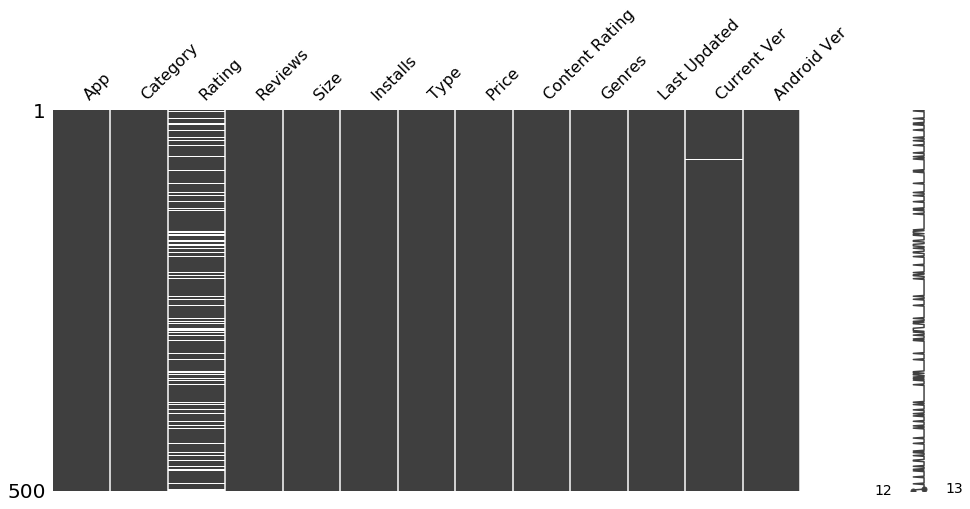

In [21]:
# 缺失值分析
msno.matrix(df_apps.sample(500), figsize=(16, 7), width_ratios=(15, 1))
# msno.bar(df_apps.sample(1000))
# 结论：用户评分Rating确实值比较多

In [22]:
print(len(df_apps[(df_apps.Type.isnull())])) # 付费、免费的缺失值
print(len(df_apps[(df_apps.Rating.isnull())])) # 评分缺失值

1
1463


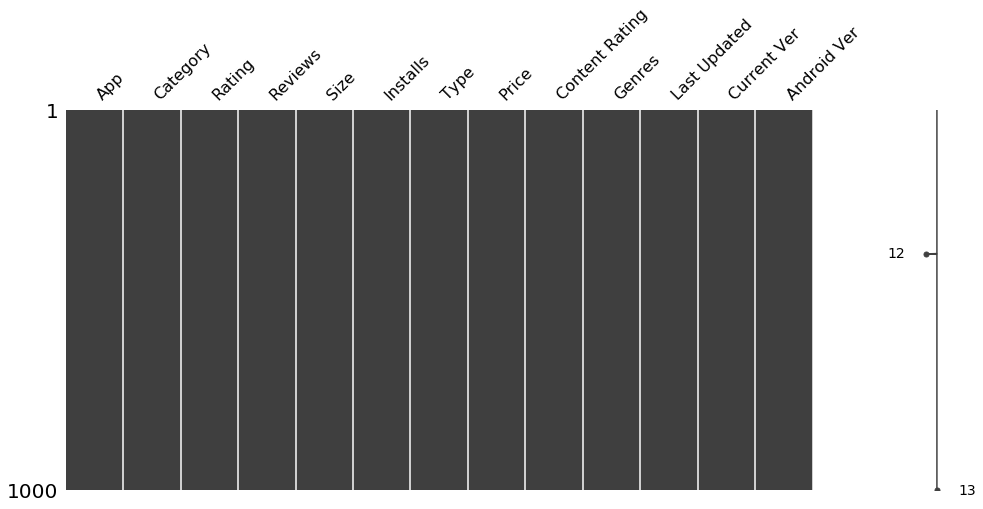

In [23]:
df_apps = df_apps[df_apps.Rating.notnull()]
df_apps = df_apps[df_apps.Type.notnull()]
msno.matrix(df_apps.sample(1000), figsize=(16, 7), width_ratios=(15, 1))

In [24]:
print(len(df_apps[(df_apps.Type.isnull())])) # 付费、免费的缺失值
print(len(df_apps[(df_apps.Rating.isnull())])) # 评分缺失值
df_apps.shape

0
0


(8196, 14)

## 数据探索分析

In [25]:
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,None
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,None
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,None
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,None
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,None


In [26]:
# 不同类型应用的数量
app_category_count = df_apps.groupby(by=['Category'])['Category'].agg(['count'])
app_category_count.T
# 按应用类型分类，排序显示
app_category_count = app_category_count.reset_index().sort_values(by=['count'], ascending=False)
# 过滤大于50的app类型
app_category_count = app_category_count[app_category_count["count"] > 50]
app_category_count.head()

,Category,count
11,FAMILY,1608
14,GAME,912
29,TOOLS,718
12,FINANCE,302
18,LIFESTYLE,301


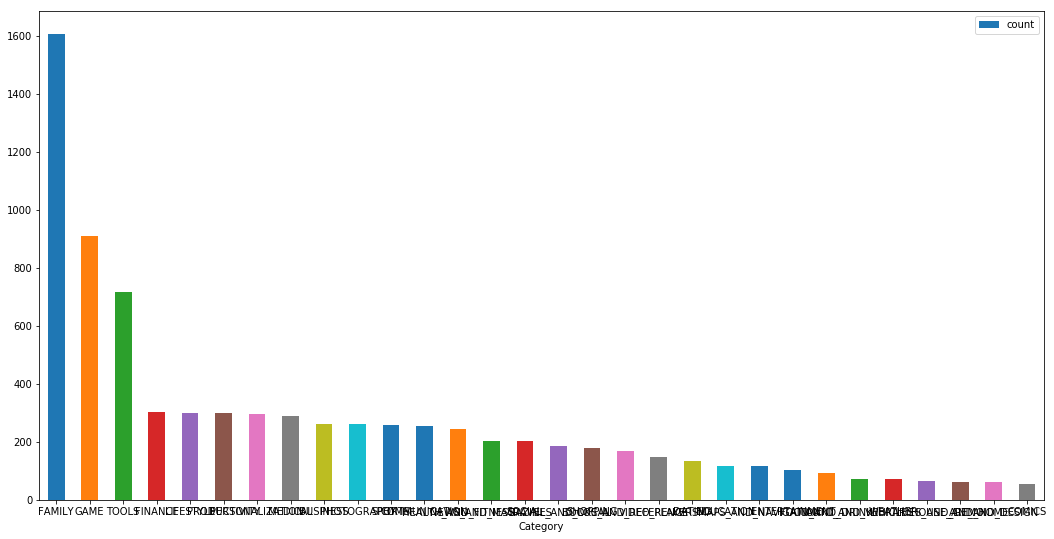

In [27]:
ax = app_category_count.plot.bar(x='Category', y='count',rot=0, figsize=(18, 9))

Text(0.5,1,'App percentage by Category')

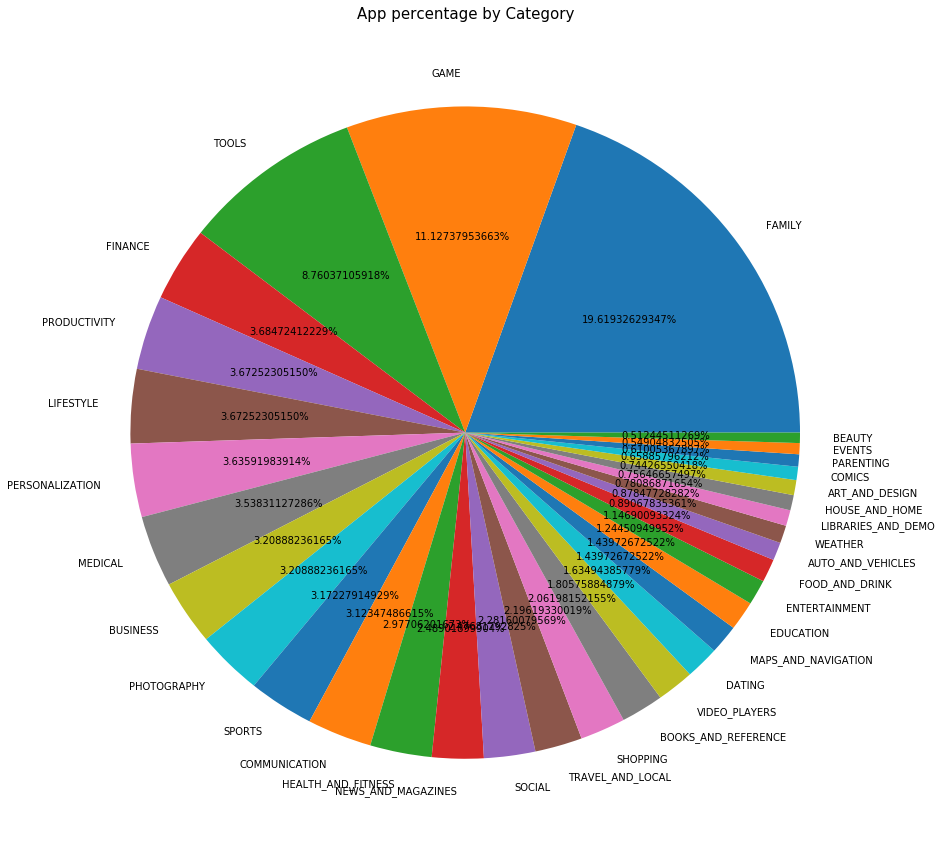

In [28]:
# 画饼图，更直观
labels = df_apps['Category'].value_counts().index
sizes = df_apps['Category'].value_counts().values
plt.figure(figsize=(15, 15))
plt.pie(sizes, labels=labels, autopct='%1.11f%%')
plt.title('App percentage by Category', fontsize=15)

### 结论：FAMILY, GAMES, TOOLS类型的App占比最高

In [29]:
df_apps.describe()

,Rating,Reviews,Size,Price
count,8196.000000,8.196000e+03,8.196000e+03,8196.000000
mean,4.173243,2.552515e+05,2.138903e+07,1.037884
std,0.536625,1.985594e+06,2.131570e+07,16.857882
min,1.000000,1.000000e+00,8.500000e+03,0.000000
25%,4.000000,1.260000e+02,5.800000e+06,0.000000
50%,4.300000,3.004000e+03,1.447216e+07,0.000000
75%,4.500000,4.381300e+04,2.831925e+07,0.000000
max,5.000000,7.815831e+07,1.000000e+08,400.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

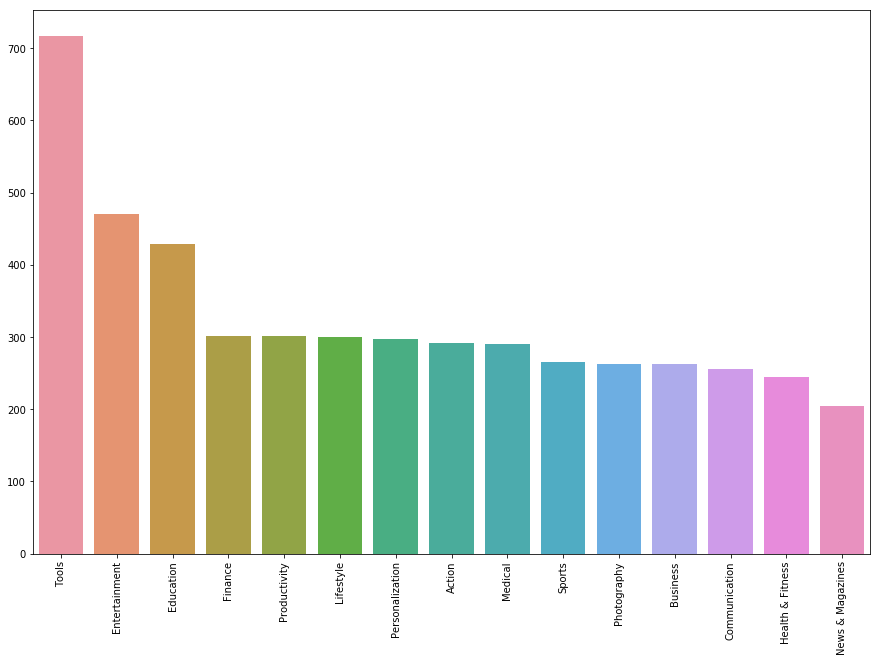

In [30]:
# 看下类型和流派
genres = df_apps['Genres'].value_counts()
plt.figure(figsize=(15,10))
sns.barplot(x=genres.index[:15], y=genres.values[:15])
plt.xticks(rotation=90)
# TOOLS流派的占比最多

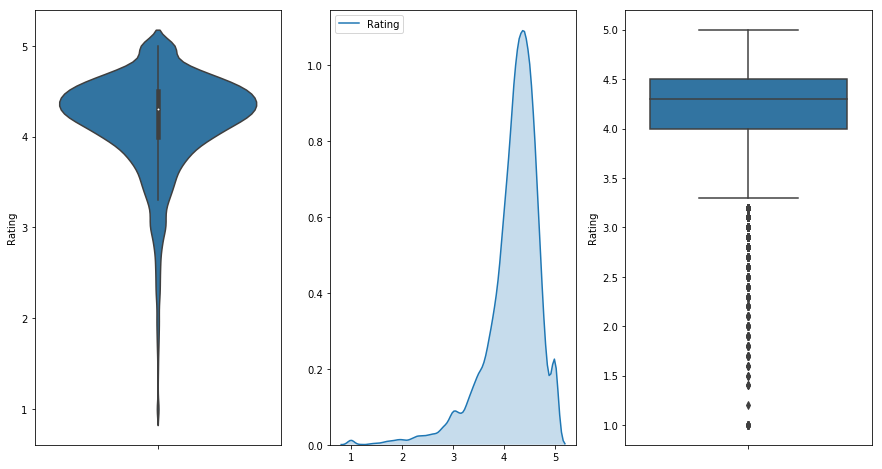

In [31]:
# 看下Rating的分布情况
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
sns.violinplot(y=df_apps['Rating'], data=df_apps, ax=ax1)
sns.kdeplot(data=df_apps.Rating, ax=ax2, shade=True)
sns.boxplot(y=df_apps.Rating, ax=ax3)

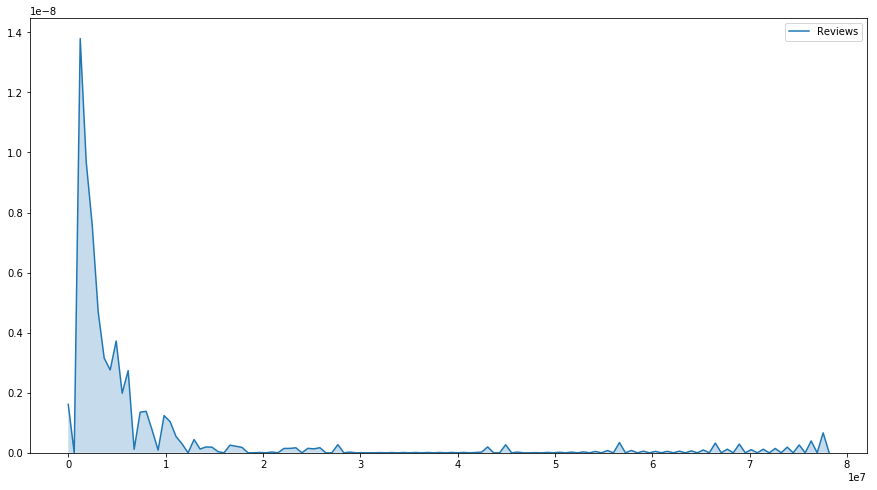

In [32]:
# 评论情况
plt.figure(figsize=(15,8))
sns.kdeplot(df_apps.Reviews, shade=True)

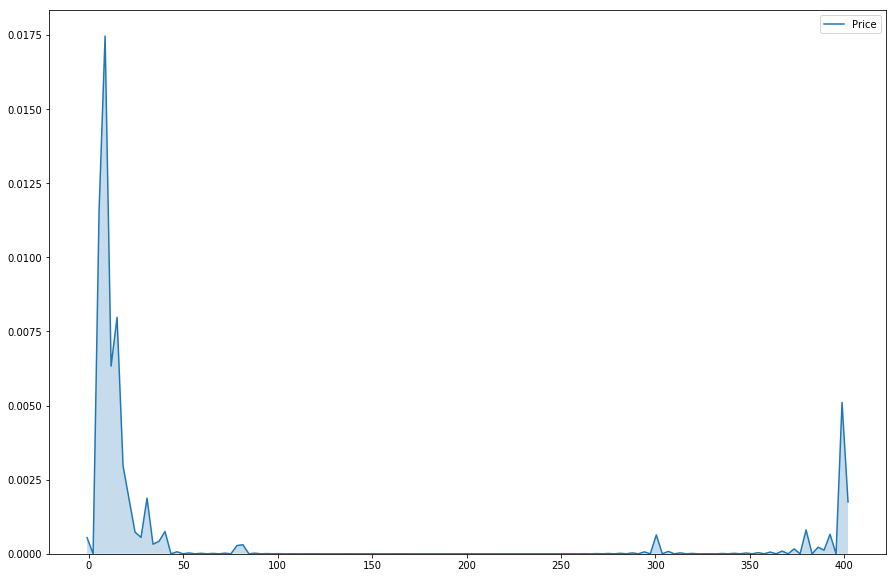

In [33]:
# App Price分布情况
plt.figure(figsize=(15,10))
sns.kdeplot(df_apps[df_apps['Price'] >0]['Price'], shade=True)

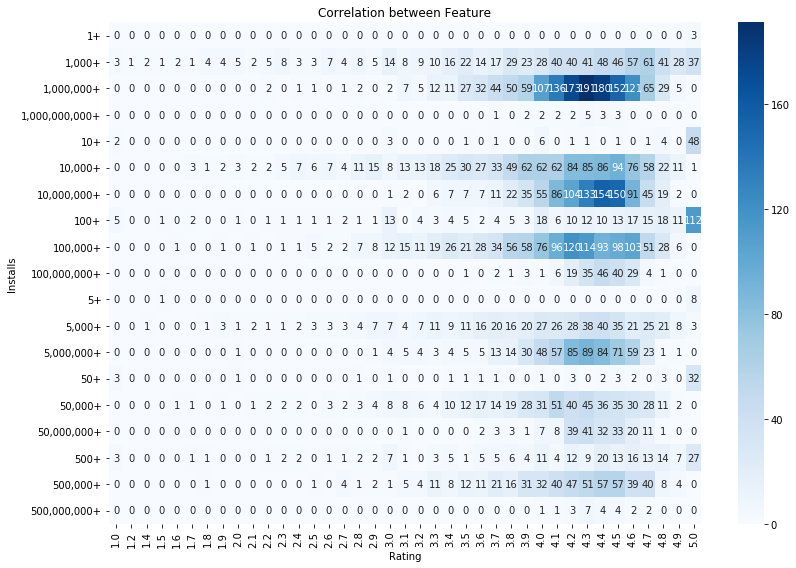

In [34]:
# 特征之间的相关性
fig,ax = plt.subplots(figsize=(12, 8))
sns.heatmap(pd.crosstab(df_apps.Installs, [df_apps.Rating]), 
            cmap='Blues', annot=True, fmt='d', ax=ax)
ax.set_title('Correlation between Feature')
fig.tight_layout()
# 评分越高，相应的下载安装量也越高，正相关

Text(0,0.5,'Counts')

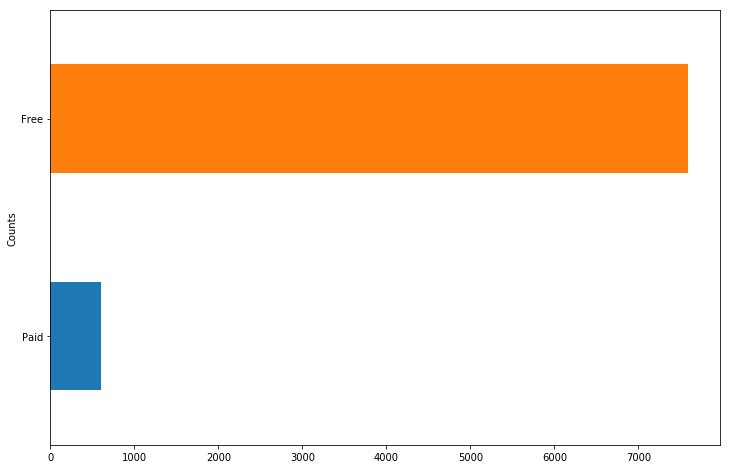

In [35]:
# 付费和免费的App占比
fig, ax = plt.subplots(figsize=(12, 8))
df_apps.Type.value_counts(dropna=False, ascending=True).plot(kind='barh', ax=ax)
ax.set_ylabel('Type')
ax.set_ylabel('Counts')
# 结论：App商城免费的应用更多

Text(0.5,1,'FREE VS NOFREE')

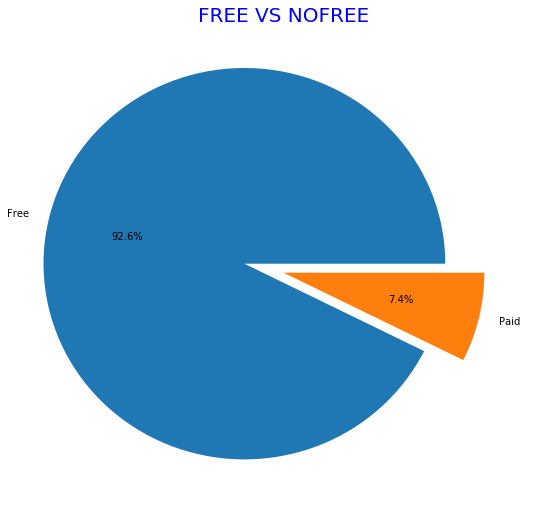

In [36]:
labels=df_apps['Type'].value_counts().index
explode = [0.2,0]  #每一块饼离中心的距离
sizes= df_apps['Type'].value_counts().values
#colors = ['grey','blue','red','yellow','green','brown']

plt.figure(figsize = (9,9))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',explode=explode)
plt.rcParams.update({'font.size': 10})
plt.title('FREE VS NOFREE',color = 'blue',fontsize = 20)

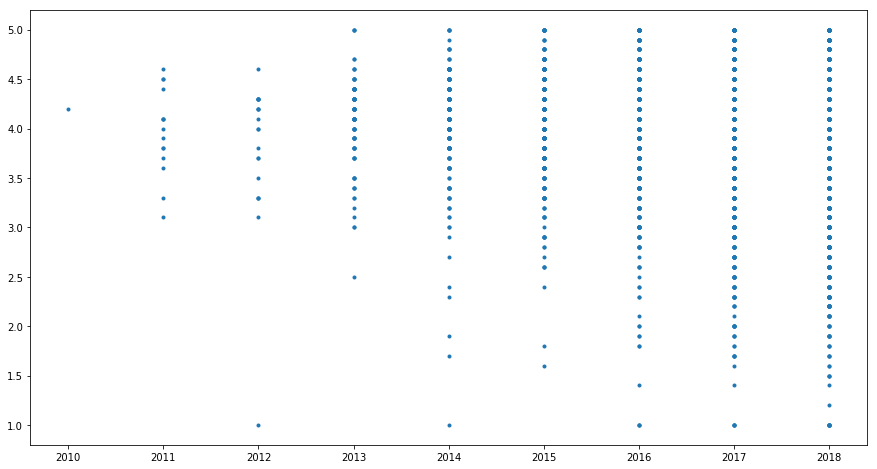

In [37]:
# 看下Rating 和 Last Updated的关系
df_apps['Last Updated'] = pd.to_datetime(df_apps['Last Updated'])
df_apps['updated_year']=df_apps['Last Updated'].dt.year
fig = plt.figure(figsize=(15,8))
plt.plot(df_apps['updated_year'], df_apps['Rating'], '.')

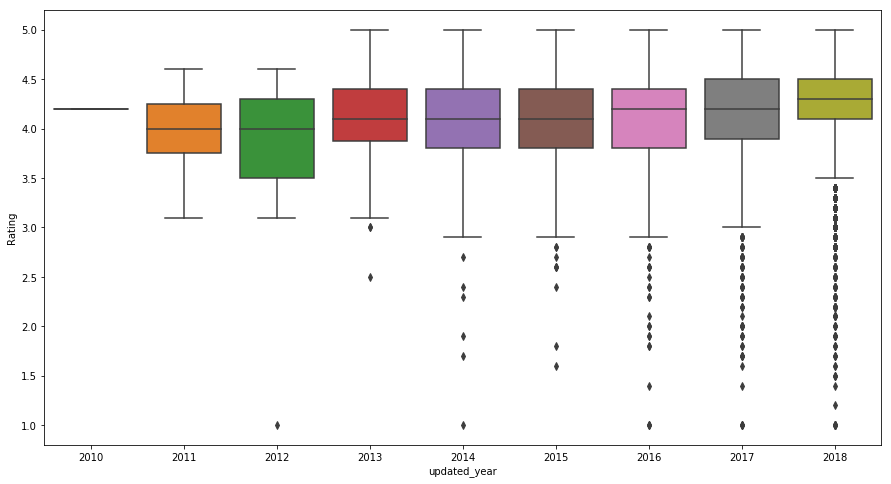

In [38]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(df_apps['updated_year'], df_apps['Rating'])

### 结论： 随着年份增加，评分在增加，符合常规，App越来越完善。

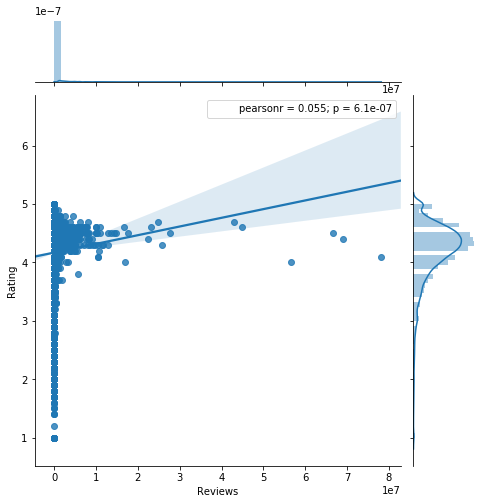

In [39]:
#看下reivews和rating是否有相关性
#pearson相关性，值在-1和+1之间，+1表示完全正相关，-1表示完全负相关，0表示没有相关性
plt.figure(figsize=(15,10))
sns.jointplot(df_apps['Reviews'],df_apps['Rating'],kind='reg',size =7)

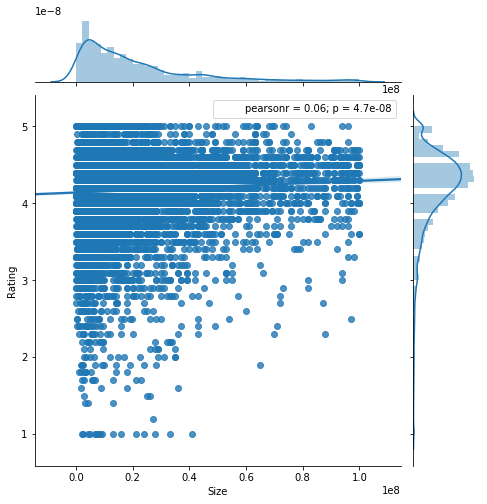

In [43]:
#看下size是否有相关性
plt.figure(figsize=(10,10))
sns.jointplot(df_apps['Size'],df_apps['Rating'],kind='reg',size =7)

Text(0.5,1,'rating distribution by category')

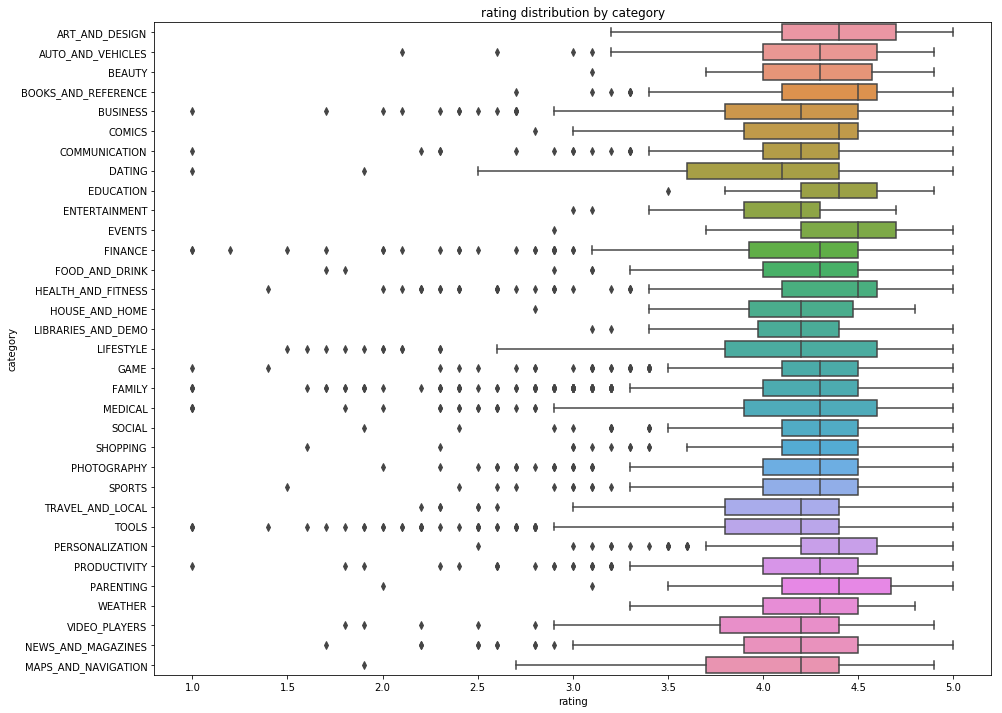

In [45]:
#看下category 和 rating 的关系
fig =plt.figure(figsize=(15,12))
sns.boxplot(y=df_apps['Category'],x=df_apps['Rating'],data=df_apps)
#plt.xticks(rotation=90)
plt.ylabel('category')
plt.xlabel('rating')
plt.title('rating distribution by category')

## 结论：可以看到 parenting、events的评分较高

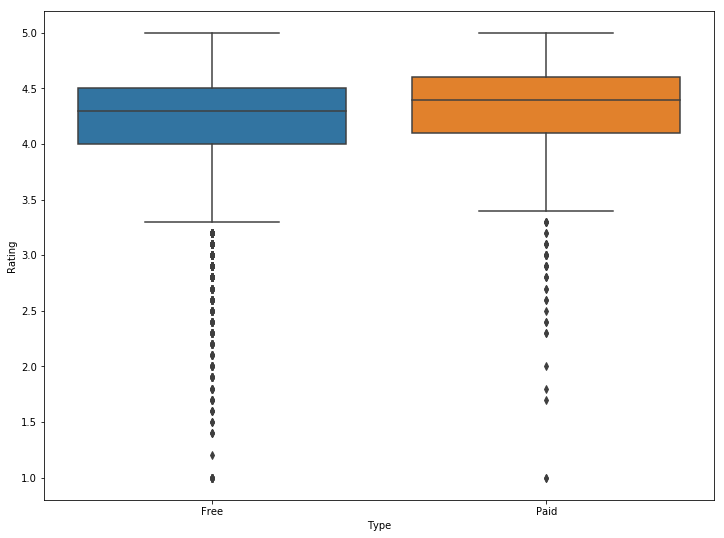

In [48]:
# Price和Rating的关系
plt.figure(figsize=(12,9))
sns.boxplot(x=df_apps['Type'],y=df_apps['Rating'],data=df_apps)

## 付费的评分较高

在数据的探索性分析中，请确保你对数据分析中的关键步骤和推理过程进行了记录。你可以自己插入code cell和markdown cell来组织你的报告。

## 得出结论

**问题**：上面的分析能够回答你提出的问题？通过这些分析你能够得出哪些结论？

**答案**：
- 1. FAMILY, GAMES, TOOLS类型的App占比最高
- 2. Tools流派的App最多
- 3. 大部分的App评分在4~5之间
- 4. 大部分App的评论数量小于10个
- 5. 大部分App的售价小于20美元
- 6. 评分和下载安装量成正相关
- 7. 免费的占92.6%
- 8. 评分和付费、类别、更新年份、软件大小有关系

## 反思

**问题**：在你的分析和总结过程中是否存在逻辑严谨。是否有改进的空间? 你可以从下面的一些角度进行思考：
1. 数据集是否完整，包含所有想要分析的数据？
2. 在对数据进行处理的时候，你的操作（例如删除/填充缺失值）是否可能影响结论？
3. 是否还有其他变量（本数据中没有）能够对你的分析有帮助？
4. 在得出结论时，你是否混淆了相关性和因果性？

**答案**：将此文本替换为你的回答！

恭喜你完成了此项目！这只是数据分析过程的一个样本：从生成问题、整理数据、探索数据到得出结论。在数据分析(进阶)纳米学位中，你将会学到更多高级的数据分析方法和技术，如果你感兴趣的话，我们鼓励你继续学习后续的课程，掌握更多的数据分析的高级技能！

> 若想与他人分享我们的分析结果，除了向他们提供 jupyter Notebook (.ipynb) 文件的副本外，我们还可以将 Notebook 输出导出为一种甚至那些未安装 Python 的人都能打开的形式。从左上方的“文件”菜单，前往“下载为”子菜单。然后你可以选择一个可以更普遍查看的格式，例如 HTML (.html) 。你可能需要额外软件包或软件来执行这些导出。